In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open(r"E:\Kaggle\games.csv", 'r', encoding='utf-8') as infile:
    lines = infile.readlines()

# Fix the header by replacing 'DiscountDLC count' with 'Discount,DLC count'
lines[0] = lines[0].replace('DiscountDLC count', 'Discount,DLC count')

with open('fixed_dataset.csv', 'w', encoding='utf-8') as outfile:
    outfile.writelines(lines)

# Now read the fixed CSV
import pandas as pd
df = pd.read_csv('fixed_dataset.csv')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111447,3600970,Paragon Of Time,"Apr 10, 2025",0 - 20000,0,0,2.99,0,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,paragonoftime.support@pm.me,True,False,False,0,NaN,0,5,0,NaN,0,0,NaN,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
111448,3543710,A Few Days With : Hazel,"Ap

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  object 
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  int64  
 6   Price                       111452 non-null  float64
 7   Discount                    111452 non-null  int64  
 8   DLC count                   111452 non-null  int64  
 9   About the game              104969 non-null  object 
 10  Supported languages         111452 non-null  object 
 11  Full audio languages        111452 non-null  object 
 12  Reviews                     10624 non-null   object 
 13  Header image  

# Data Cleaning

In [7]:
df.drop(columns=['Required age','Header image','Website','Support email', 'Score rank', 'Notes','Support url', 'Metacritic url', 'Movies','Screenshots'], inplace=True)

In [8]:
df[df['Name'].isna()]

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
25222,396420,NaN,"Nov 1, 2016",0 - 0,0,0.00,0,0,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。 村...,[],[],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
72038,1116910,NaN,"Sep 25, 2019",0 - 0,0,6.99,0,0,NaN,[],[],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,"Single-player,Steam Cloud","Action,Adventure,Casual,Indie,RPG,Simulation,S...",NaN
77215,1365520,NaN,"Aug 30, 2020",0 - 0,0,0.00,0,0,NaN,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,"Single-player,Steam Cloud",Early Access,NaN
77487,1080790,NaN,"Jul 12, 2019",0 - 0,0,0.00,0,0,NaN,['English'],[],NaN,True,False,False,0,0,0,0,20,0,0,0,0,0,NaN,NaN,NaN,"Adventure,Casual,Free to Play,Indie,RPG",NaN
77561,1256960,NaN,"Mar 11, 2020",0 - 20000,0,0.00,0,0,NaN,['English'],['English'],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
77721,1172120,NaN,"Jan 23, 2020",0 - 0,0,0.00,0,0,NaN,['English'],[],NaN,True,True,True,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Single-player,"Action,Indie,Simulation",NaN


In [9]:
df.dropna(subset=['Name'], inplace = True)

In [10]:
df['About the game'] = df['About the game'].fillna('No description available')

In [11]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

In [12]:
df['Year'] = pd.DatetimeIndex(df['Release date']).year

In [13]:
df['Estimated owners'].unique()

array(['0 - 20000', '50000 - 100000', '20000 - 50000', '200000 - 500000',
       '100000 - 200000', '2000000 - 5000000', '0 - 0',
       '500000 - 1000000', '1000000 - 2000000', '20000000 - 50000000',
       '5000000 - 10000000', '10000000 - 20000000',
       '50000000 - 100000000', '100000000 - 200000000'], dtype=object)

In [14]:
df[['min_owners', 'max_owners']] = df['Estimated owners'].str.split(' - ', expand=True).astype(int)
df['avg_owners'] = (df['min_owners'] + df['max_owners']) // 2

In [15]:
df = df[df['avg_owners'] != 0].copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89360 entries, 0 to 111451
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       89360 non-null  int64         
 1   Name                        89360 non-null  object        
 2   Release date                89238 non-null  datetime64[ns]
 3   Estimated owners            89360 non-null  object        
 4   Peak CCU                    89360 non-null  int64         
 5   Price                       89360 non-null  float64       
 6   Discount                    89360 non-null  int64         
 7   DLC count                   89360 non-null  int64         
 8   About the game              89360 non-null  object        
 9   Supported languages         89360 non-null  object        
 10  Full audio languages        89360 non-null  object        
 11  Reviews                     10235 non-null  object        

In [17]:
df.Genres.unique()

array(['Casual,Indie,Sports', 'Action,Indie',
       'Action,Adventure,Indie,Strategy', ...,
       'Animation & Modeling,Utilities,Video Production,Game Development',
       'Action,Adventure,Casual,Indie,Racing,Sports,Strategy,Free To Play',
       'Action,Casual,Indie,Massively Multiplayer,RPG,Strategy'],
      dtype=object)

# Filling Genres

In [19]:
df[df['Genres'].isna()].sort_values('avg_owners', ascending = False).head(20)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners
37677,241930,Middle-earth™: Shadow of Mordor™,2014-09-30,5000000 - 10000000,676,19.99,0,16,Note: certain features for the Middle-earth: S...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",“AMAZING” 9.3/10 – IGN “Revolutionary” 5/5 – J...,True,False,False,84,0,69399,5837,74,48164,1067,34,648,35,Monolith Productions,"Warner Bros. Interactive Entertainment,Warner ...","Single-player,Steam Achievements,Full controll...",NaN,"Open World,Action,Fantasy,Adventure,Third Pers...",2014.0,5000000,10000000,7500000
19291,900883,The Elder Scrolls IV: Oblivion® Game of the Ye...,2009-06-16,1000000 - 2000000,0,19.99,0,0,The Elder Scrolls IV: Oblivion® Game of the Ye...,['English'],[],NaN,True,False,False,94,0,35307,1639,0,29646,0,0,0,0,Bethesda Game Studios®,Bethesda Softworks,"Single-player,Steam Cloud",NaN,"RPG,Open World,Fantasy,Singleplayer,Moddable,F...",2009.0,1000000,2000000,1500000
1346,71250,Sonic Adventure DX,2011-03-04,500000 - 1000000,115,7.99,0,0,An ancient evil lurking within the Master Emer...,"['English', 'French', 'German', 'Japanese', 'S...",[],NaN,True,False,False,0,0,9673,1097,15,8734,360,23,126,23,SEGA,SEGA,"Single-player,Partial Controller Support",NaN,"Platformer,3D Platformer,Great Soundtrack,Adve...",2011.0,500000,1000000,750000
77711,200940,Sonic CD,2012-01-19,200000 - 500000,5,0.00,0,0,It’s time to usher the past into the future in...,"['English', 'French', 'German', 'Italian', 'Sp...",[],NaN,True,False,False,0,0,4600,536,12,3772,29,0,19,0,Blit Software,SEGA,"Single-player,Full controller support,Remote P...",NaN,"Platformer,Classic,Great Soundtrack,Retro,Time...",2012.0,200000,500000,350000
47232,104600,Portal 2 - The Final Hours,2011-05-17,200000 - 500000,1,1.99,0,0,Portal 2 draws from the award-winning formula ...,['English'],[],NaN,True,True,False,0,0,488,128,0,553,49,0,31,0,Geoff Keighley,Geoff Keighley,Single-player,NaN,"Documentary,Story Rich,Action,Puzzle,Adventure...",2011.0,200000,500000,350000
59897,202530,Sonic the Hedgehog 4 - Episode I,2012-01-19,200000 - 500000,8,9.99,0,0,The sequel fans have waited 16 years for is fi...,"['English', 'German', 'French', 'Italian', 'Sp...","['English', 'German', 'French', 'Italian', 'Sp...",NaN,True,False,False,0,0,1055,1439,12,1595,125,0,100,0,SEGA,SEGA,"Single-player,Partial Controller Support",NaN,"Platformer,2D,Action,Adventure,Singleplayer,Co...",2012.0,200000,500000,350000
16468,22340,Call of Cthulhu®: Dark Corners of the Earth,2009-06-16,200000 - 500000,8,4.99,0,0,Call of Cthulhu: Dark Corners of the Earth is ...,['English'],[],NaN,True,False,False,76,0,1844,850,0,2298,379,0,738,0,Headfirst Productions,Bethesda Softworks,Single-player,NaN,"Lovecraftian,Horror,First-Person,Survival Horr...",2009.0,200000,500000,350000
25836,667720,Red Faction Guerrilla Re-Mars-tered,2018-07-03,200000 - 500000,56,19.99,0,1,Set 50 years after the climactic events of the...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,0,0,2483,608,57,2349,361,0,133,0,"Volition,KAIKO",Deep Silver,"Single-player,Multi-player,PvP,Online PvP,Stea...",NaN,"Destruction,Open World,Mars,Third-Person Shoot...",2018.0,200000,500000,350000
10064,1409670,Bright Memory: Infinite Ray Tracing Benchmark,2020-09-24,200000 - 500000,0,0.00,0,0,Benchmark software created by FYQD-Studio to t...,"['English', 'French', 'German', 'Spanish - Lat...",[],NaN,True,False,False,0,0,41,1,0,0,0,0,0,0,FYQD-Studio,"FYQD-Studio,PLAYISM",Single-player,NaN,"Utilities,Indie,Benchmark,Female P

In [20]:
df[(df['Genres'].isna()) & (df['Tags'].isna())].sort_values('avg_owners', ascending = False).head(20)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners
3002,529640,SteamVR Driver for FOVE,2019-01-11,0 - 20000,0,0.00,0,0,This driver adds support for the FOVE 0 head-m...,['English'],[],NaN,True,False,False,0,0,2,0,0,0,0,0,0,0,"FOVE, Inc.","FOVE, Inc.",NaN,NaN,NaN,2019.0,0,20000,10000
6293,603210,Valkyries,2018-09-17,0 - 20000,1,1.99,0,0,Ateon. Gaia created this land so that she coul...,['English'],[],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,Heartomics,Heartomics,"Single-player,Steam Trading Cards",NaN,NaN,2018.0,0,20000,10000
40103,325670,CRYENGINE - Wwise Project DLC,2014-10-07,0 - 20000,0,0.00,0,0,The EaaS Wwise Project DLC gives you access to...,['English'],['English'],NaN,True,False,False,0,0,1,0,0,0,0,0,0,0,Crytek,Crytek,"Stats,Includes level editor",NaN,NaN,2014.0,0,20000,10000
55226,1019030,Project Centauri,2019-03-20,0 - 20000,0,5.99,0,0,Project Centauri As you travel to find a new h...,['English'],['English'],NaN,True,False,False,0,0,0,1,0,0,0,0,0,0,Abstract Games Studio,Abstract Games Studio,Single-player,NaN,NaN,2019.0,0,20000,10000
56568,867580,Magic Flight Academy,2018-06-13,0 - 20000,0,6.99,0,0,MUST HAVE for VR arcade centers. Perfect for t...,['English'],[],NaN,True,False,False,0,0,1,4,0,0,0,0,0,0,Avatarico,Avatarico,Single-player,NaN,NaN,2018.0,0,20000,10000
60665,306510,CRYENGINE - Sample Assets,2014-06-06,0 - 20000,0,0.00,0,0,The CRYENGINE Sample Assets is a Free DLC pack...,['English'],['English'],NaN,True,False,False,0,0,2,0,0,0,0,0,0,0,Crytek,Crytek,"Stats,Includes level editor",NaN,NaN,2014.0,0,20000,10000
61502,830640,DayZ Tools,2018-11-07,0 - 20000,46,0.00,0,0,DayZ Tools is a complete tools suite for the E...,['English'],[],NaN,True,False,False,0,0,140,20,0,135,0,0,0,0,Bohemia Interactive,Bohemia Interactive,NaN,NaN,NaN,2018.0,0,20000,10000


In [21]:
df['Genres'] = df['Genres'].fillna(df['Tags'])

In [22]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,True,False,False,0,0,6,11,30,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008.0,0,20000,10000
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,False,0,0,53,5,12,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017.0,0,20000,10000
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,2021.0,0,20000,10000
3,1355720,Henosis™,2020-07-23,0 - 20000,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,True,0,0,3,0,0,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020.0,0,20000,10000
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,True,True,False,0,0,50,8,17,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020.0,0,20000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111446,3593600,Starry Trace,2025-04-14,0 - 20000,0,1.21,40,0,Welcome to Starry Trace ! A relaxing yet brain...,"['English', 'Japanese', 'Simplified Chinese', ...",[],NaN,True,False,False,0,0,1,0,10,0,0,0,0,0,Pomegranate Games,Pomegranate Games,"Single-player,Steam Achievements,Full controll...","Casual,Indie,Strategy","Casual,Strategy,Puzzle,Relaxing,2D,Cute,Detect...",2025.0,0,20000,10000
111447,3600970,Paragon Of Time,2025-04-10,0 - 20000,0,2.99,0,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,True,False,False,0,0,5,0,0,0,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro...",2025.0,0,20000,10000
111448,3543710,A Few Days With : Hazel,2025-04-11,0 - 20000,0,2.69,10,0,"Join Hazel, an attractive young lady, and enjo...","['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,False,False,0,0,0,0,7,0,0,0,0,0,Hentai Panda,Hentai Panda,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,2025.0,0,20000,10000
111449,3265370,MosGhost,2025-04-01,0 - 20000,0,7.99,0,0,Story : Andrei moved to Moscow for work and re...,"['English', 'Russian', 'French', 'Italian', 'G...",[],NaN,True,False,False,0,0,24,12,0,0,0,0,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso...",2025.0,0,20000,10000


# Free Games

In [88]:
df['is_free']  = (
    df['Categories'].str.contains('free', case=False, na=False) |
    df['Genres'].str.contains('free', case=False, na=False) |
    df['Tags'].str.contains('free', case=False, na=False)
)

# Step 2: Define custom binning using np.select()
conditions = [
    df['is_free'],                                # Tag says free
    df['Price'] < 5,                                # Less than $5
    (df['Price'] >= 5) & (df['Price'] < 10),
    (df['Price'] >= 10) & (df['Price'] < 20),
    (df['Price'] >= 20) & (df['Price'] < 30),
    df['Price'] >= 30
]

choices = ['Free', '<$5', '$5-10', '$10-20', '$20-30', '$30+']

df['Price Range'] = np.select(conditions, choices, default='Unknown')


In [90]:
df['is_free'].value_counts()

is_free
False    84696
True      4539
Name: count, dtype: int64

# Price Filtering

In [93]:
df[df['Price'] >100].sort_values('avg_owners', ascending = False).head(20)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range


In [95]:
df = df[df['Price'] <100].copy() 

bins = [0, 0.01, 5, 10, 20, 30, 100]
labels = ['Free', '<$5', '$5-10', '$10-20', '$20-30', '$30+']
df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

# Filter out free games to focus on paid ones (Price > 0)
df_paid = df[df['Price'] > 0]

In [98]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,True,False,False,0,0,6,11,30,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008.0,0,20000,10000,False,$10-20
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,False,0,0,53,5,12,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017.0,0,20000,10000,False,<$5
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,2021.0,0,20000,10000,False,<$5
3,1355720,Henosis™,2020-07-23,0 - 20000,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,True,0,0,3,0,0,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020.0,0,20000,10000,False,$5-10
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,True,True,False,0,0,50,8,17,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020.0,0,20000,10000,False,<$5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111446,3593600,Starry Trace,2025-04-14,0 - 20000,0,1.21,40,0,Welcome to Starry Trace ! A relaxing yet brain...,"['English', 'Japanese', 'Simplified Chinese', ...",[],NaN,True,False,False,0,0,1,0,10,0,0,0,0,0,Pomegranate Games,Pomegranate Games,"Single-player,Steam Achievements,Full controll...","Casual,Indie,Strategy","Casual,Strategy,Puzzle,Relaxing,2D,Cute,Detect...",2025.0,0,20000,10000,False,<$5
111447,3600970,Paragon Of Time,2025-04-10,0 - 20000,0,2.99,0,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,True,False,False,0,0,5,0,0,0,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro...",2025.0,0,20000,10000,False,<$5
111448,3543710,A Few Days With : Hazel,2025-04-11,0 - 20000,0,2.69,10,0,"Join Hazel, an attractive young lady, and enjo...","['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,False,False,0,0,0,0,7,0,0,0,0,0,Hentai Panda,Hentai Panda,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,2025.0,0,20000,10000,False,<$5
111449,3265370,MosGhost,2025-04-01,0 - 20000,0,7.99,0,0,Story : Andrei moved to Moscow for work and re...,"['English', 'Russian', 'French', 'Italian', 'G...",[],NaN,True,False,False,0,0,24,12,0,0,0,0,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso...",2025.0,0,20000,10000,False,$5-10


In [100]:
df['Price Range'].unique()

array(['$10-20', '<$5', '$5-10', 'Free', '$20-30', '$30+'], dtype=object)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89235 entries, 0 to 111451
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       89235 non-null  int64         
 1   Name                        89235 non-null  object        
 2   Release date                89113 non-null  datetime64[ns]
 3   Estimated owners            89235 non-null  object        
 4   Peak CCU                    89235 non-null  int64         
 5   Price                       89235 non-null  float64       
 6   Discount                    89235 non-null  int64         
 7   DLC count                   89235 non-null  int64         
 8   About the game              89235 non-null  object        
 9   Supported languages         89235 non-null  object        
 10  Full audio languages        89235 non-null  object        
 11  Reviews                     10232 non-null  object        

In [104]:
df.sort_values('Average playtime forever', ascending = False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
10228,1071100,Boom 3D,2019-06-19,20000 - 50000,199,16.99,0,0,Boom 3D is a pro audio enhancement app that ha...,"['English', 'French', 'German', 'Spanish - Spa...",[],NaN,True,False,False,0,0,426,43,0,442,145727,21,145727,21,Global Delight Technologies Pvt. Ltd.,Global Delight Technologies Pvt. Ltd.,NaN,"Audio Production,Utilities","Utilities,Audio Production,VR,3D",2019.0,20000,50000,35000,False,$10-20
19303,1055010,Energy Engine PC Live Wallpaper,2019-05-10,50000 - 100000,67,3.99,0,0,Energy Engine PC Live Wallpaper Manage the ene...,"['English', 'French', 'German', 'Spanish - Spa...",[],NaN,True,False,False,0,0,198,128,0,307,104238,1430,208473,1430,3dm_live_wallpapers,3dm_live_wallpapers,NaN,"Design & Illustration,Utilities","Design & Illustration,Utilities,Software,Simul...",2019.0,50000,100000,75000,False,<$5
36483,1195830,副作用之瞳-Tlicolity Eyes-,2021-06-29,50000 - 100000,13,0.00,0,3,《副作用之瞳 (Tlicolity Eyes)》是日本女性向遊戲廠商Otomate於2018...,"['Simplified Chinese', 'Traditional Chinese']",[],NaN,True,False,False,0,0,72,27,0,0,90351,0,90351,0,"IDEA FACTORY,Frontier Works,JoyMoe Interactive...",JoyMoe Interactive Entertainment Limited,Single-player,"Adventure,Casual,Free to Play,RPG","Interactive Fiction,Visual Novel,Word Game,Dat...",2021.0,50000,100000,75000,True,Free
23309,707590,Defense Clicker,2017-10-31,20000 - 50000,3,0.00,0,2,Defense Clicker is an clicker game which will ...,['English'],['English'],NaN,True,False,False,0,0,90,40,315,0,76068,0,76068,0,Albatros Softworks,Albatros Softworks,"Single-player,Steam Achievements,Steam Cloud,S...","Casual,Strategy,Early Access","Casual,Strategy,Early Access,Tower Defense,Cli...",2017.0,20000,50000,35000,False,<$5
39591,404580,Relive,2015-10-15,50000 - 100000,0,0.00,0,0,Relive is a game about cardiopulmonary resusci...,"['English', 'Italian', 'Dutch']","['English', 'Dutch']",NaN,True,True,False,0,0,106,47,20,0,68357,0,136629,0,Studio Evil,Studio Evil,"Single-player,Steam Achievements","Adventure,Free to Play,Indie","Free to Play,Indie,Adventure",2015.0,50000,100000,75000,True,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,510850,Mars 2030,2017-07-31,0 - 20000,0,14.99,0,0,Suit up for the first manned mission to Mars! ...,['English'],['English'],NaN,True,False,False,0,0,56,27,10,0,0,0,0,0,FMG Labs,Fusion Media Group,"Single-player,Steam Achievements,Full controll...",Simulation,"Simulation,Mars,Space,Exploration,VR",2017.0,0,20000,10000,False,$10-20
36231,737260,Coaster of Carnage VR,2017-12-05,0 - 20000,0,0.99,0,0,Take a true thrill ride on a deserted roller c...,['English'],['English'],NaN,True,False,False,0,0,8,16,1,0,0,0,0,0,Kevin Gulling,ARVRCADE,"Single-player,Steam Achievements","Violent,Gore,Simulation,Early Access","Early Access,Simulation,Gore,Violent,VR",2017.0,0,20000,10000,False,<$5
36230,544600,Delicious - Emily's Christmas Carol,2016-11-04,0 - 20000,5,12.99,0,1,"Enjoy Delicious, the award-winning cooking sto...","['English', 'French', 'Italian', 'German', 'Sp...",[],“Deck the Delicious Halls” 5/5 – Gamezebo,True,False,False,0,0,140,17,21,145,0,0,0,0,"Blue Giraffe,GameHouse",GameHouse,"Single-player,Steam Achievements","Adventure,Casual,Indie","Casual,Adventure,Indie,Time Management,Family ...",2016.0,0,20000,10000,False,$10-20
36228,1093900,神谋,2019-07-01,0 - 20000,0,1.99,0,0,Shenmou is a classic turn-based RPG game with ...,['Simplified Chinese'],['Simplified Chinese'],NaN,True,False,False,0,0,13,3,0,0,0,0,0,0,个人制作,个人制作,Single-player,"A

# keeping only games removing other utilities, create new df

In [107]:
pd.reset_option('display.max_rows', None)

In [109]:
game_genres = ["Action", "Arcade & Rhythm", "Fighting & Martial Arts", "First-Person Shooter", "Hack & Slash", "Platformer & Runner", "Third-Person Shooter", "shmup", "Adventure", "Adventure RPG", "Casual", "Hidden Object", "Metroidvania", "Puzzle", "Story-Rich", "Visual Novel", "Action RPG", "JRPG", "Indie", "RPG", "Party-Based", "Rogue-Like", "Strategy RPG", "Turn-Based", "Simulation", "Building & Automation", "Dating", "Farming & Crafting", "Hobby & Job", "Life & Immersive", "Sandbox & Physics", "Space & Flight", "Strategy", "Card & Board", "City & Settlement", "Grand & 4X", "Military", "Real-Time Strategy", "Tower Defense", "Turn-Based Strategy", "Sports & Racing", "All Sports", "Fishing & Hunting", "Individual Sports", "Racing", "Racing Sim", "Sports", "Free to Play", "Sports Sim", "Team Sports"]


In [111]:
df_games = df[(df['Genres'].str.contains('|'.join(game_genres), na=False)) | (df['Tags'].str.contains('|'.join(game_genres), na=False)) ]

In [112]:
df_games[df_games['Average playtime forever'] > 140000]

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range


# cross check

In [116]:
mask = (df['Genres'].str.contains('|'.join(game_genres), na=False)) | (df['Tags'].str.contains('|'.join(game_genres), na=False))
removed_rows = df[~mask]


In [117]:
removed_rows.sort_values('avg_owners', ascending = False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
18432,629520,Soundpad,2017-09-30,1000000 - 2000000,13945,4.99,0,0,Play sounds in voice chats in high digital qua...,"['English', 'German', 'French', 'Korean', 'Por...",[],NaN,True,False,False,0,0,41198,1427,0,39388,17073,411,4054,169,Leppsoft,Leppsoft,NaN,"Audio Production,Utilities","Utilities,Audio Production,Music,Software,Meme...",2017.0,1000000,2000000,1500000,False,<$5
16915,431730,Aseprite,2016-02-22,500000 - 1000000,2994,19.99,0,0,Aseprite is a pixel art tool that lets you cre...,['English'],[],NaN,True,True,True,0,0,11028,69,0,8683,6726,800,2210,1100,David Capello,Igara Studio,NaN,"Animation & Modeling,Design & Illustration,Gam...","Pixel Graphics,Design & Illustration,Animation...",2016.0,500000,1000000,750000,False,$10-20
7155,367670,Controller Companion,2015-05-04,200000 - 500000,127,2.99,0,0,Use your controller even when you're not in-ga...,"['English', 'Russian', 'Simplified Chinese']",[],NaN,True,False,False,0,0,2176,216,0,2283,3481,0,44,0,Koga Tech Limited,Koga Tech Limited,"Full controller support,Steam Workshop",Utilities,"Utilities,Controller,Software",2015.0,200000,500000,350000,False,<$5
78186,267130,Star Swarm Stress Test,2014-01-30,200000 - 500000,2,0.00,0,0,Welcome to the newest frontier in gaming: batt...,['English'],[],NaN,True,False,False,0,0,285,30,0,0,0,0,0,0,Oxide Games,Stardock Entertainment,Single-player,Utilities,"Utilities,Benchmark",2014.0,200000,500000,350000,False,<$5
61238,382110,Virtual Desktop,2016-03-31,200000 - 500000,102,14.99,0,0,Virtual Desktop is an application for the Ocul...,"['English', 'French', 'German', 'Japanese']","['English', 'French', 'German', 'Japanese']",“These are the kinds of programs that change t...,True,False,False,0,0,1250,524,0,1704,512,41,221,41,Guy Godin,Guy Godin,"VR Support,Steam Workshop,Partial Controller S...",Utilities,"VR,Utilities,Software,VR Only",2016.0,200000,500000,350000,False,$10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29340,1046770,Juice FX,2019-03-26,0 - 20000,4,19.99,0,0,EASILY CREATE JUICY ANIMATIONS Add any animati...,['English'],[],NaN,True,False,False,0,0,66,14,0,0,0,0,0,0,"CodeManu,Davit Masia",CodeManu,NaN,"Animation & Modeling,Design & Illustration,Uti...","Utilities,Game Development,Design & Illustrati...",2019.0,0,20000,10000,False,$10-20
29437,1219140,2D Vtuber Cutiecats,2020-03-03,0 - 20000,0,10.99,0,0,The 2D Vtuber Cutiecats program can help those...,['English'],[],NaN,True,False,False,0,0,1,0,0,0,0,0,0,0,thebomenet,thebomenet,NaN,Video Production,Video Production,2020.0,0,20000,10000,False,$10-20
29440,1163170,Music Desktop,2019-10-04,0 - 20000,0,1.99,0,0,Music Desktop is a unique video player that ca...,"['English', 'Simplified Chinese']",[],NaN,True,False,False,0,0,7,1,0,0,0,0,0,0,chengcong,chengcong,NaN,Utilities,Utilities,2019.0,0,20000,10000,False,<$5
29443,1153510,Daily OVR Free,2020-03-16,0 - 20000,0,0.00,0,0,Daily OVR Free is a free version of Daily OVR....,"['English', 'Japanese', 'Simplified Chinese']",[],NaN,True,False,False,0,0,14,7,0,0,0,0,0,0,TM xR Lab,TM xR Lab,NaN,Utilities,"Utilities,VR Only",2020.0,0,20000,10000,False,<$5


In [120]:
df_games.sort_values('Average playtime forever', ascending = False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
19303,1055010,Energy Engine PC Live Wallpaper,2019-05-10,50000 - 100000,67,3.99,0,0,Energy Engine PC Live Wallpaper Manage the ene...,"['English', 'French', 'German', 'Spanish - Spa...",[],NaN,True,False,False,0,0,198,128,0,307,104238,1430,208473,1430,3dm_live_wallpapers,3dm_live_wallpapers,NaN,"Design & Illustration,Utilities","Design & Illustration,Utilities,Software,Simul...",2019.0,50000,100000,75000,False,<$5
36483,1195830,副作用之瞳-Tlicolity Eyes-,2021-06-29,50000 - 100000,13,0.00,0,3,《副作用之瞳 (Tlicolity Eyes)》是日本女性向遊戲廠商Otomate於2018...,"['Simplified Chinese', 'Traditional Chinese']",[],NaN,True,False,False,0,0,72,27,0,0,90351,0,90351,0,"IDEA FACTORY,Frontier Works,JoyMoe Interactive...",JoyMoe Interactive Entertainment Limited,Single-player,"Adventure,Casual,Free to Play,RPG","Interactive Fiction,Visual Novel,Word Game,Dat...",2021.0,50000,100000,75000,True,Free
23309,707590,Defense Clicker,2017-10-31,20000 - 50000,3,0.00,0,2,Defense Clicker is an clicker game which will ...,['English'],['English'],NaN,True,False,False,0,0,90,40,315,0,76068,0,76068,0,Albatros Softworks,Albatros Softworks,"Single-player,Steam Achievements,Steam Cloud,S...","Casual,Strategy,Early Access","Casual,Strategy,Early Access,Tower Defense,Cli...",2017.0,20000,50000,35000,False,<$5
39591,404580,Relive,2015-10-15,50000 - 100000,0,0.00,0,0,Relive is a game about cardiopulmonary resusci...,"['English', 'Italian', 'Dutch']","['English', 'Dutch']",NaN,True,True,False,0,0,106,47,20,0,68357,0,136629,0,Studio Evil,Studio Evil,"Single-player,Steam Achievements","Adventure,Free to Play,Indie","Free to Play,Indie,Adventure",2015.0,50000,100000,75000,True,Free
57947,517910,Sisyphus Reborn,2016-09-05,50000 - 100000,0,0.00,0,2,Sisyphus Reborn is a short atmospheric existen...,"['English', 'Spanish - Spain', 'German', 'Fren...",[],“Simple but beautiful ... a profound philosoph...,True,False,True,0,0,840,63,7,0,68159,0,136291,0,"Edwin Montgomery,Myshkin Entertainment",Myshkin Entertainment,"Single-player,Steam Achievements",Adventure,"Adventure,Free to Play,Atmospheric,Philosophic...",2016.0,50000,100000,75000,True,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36371,1628930,Cupcake Remember,2021-10-08,0 - 20000,0,2.99,0,0,"Cupcake Remember is a fun, challenging and cut...",['English'],['English'],NaN,True,False,False,0,0,1,0,10,0,0,0,0,0,Paulo Junior,Zakay Games,"Single-player,Steam Achievements,Partial Contr...",Casual,"Casual,Puzzle,Family Friendly,Puzzle-Platforme...",2021.0,0,20000,10000,False,<$5
36370,1827720,Sabotris,2022-07-10,0 - 20000,0,7.99,0,0,"Sabotris is a strategic, competitive, 3D block...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,True,True,0,0,1,0,1,0,0,0,0,0,Phlarfl,Phlarfl,"Single-player,Multi-player,PvP,Online PvP,Cros...","Casual,Indie,Strategy","Casual,Strategy,Arcade,Puzzle,3D,Abstract,Colo...",2022.0,0,20000,10000,False,$5-10
36369,852750,Paper Shakespeare: Stick Merchant of Venice,2018-05-11,0 - 20000,0,1.99,0,1,Shakespeare's classic play about how intoleran...,['English'],[],NaN,True,False,True,0,0,1,1,11,0,0,0,0,0,Stegalosaurus Game Development,Stegalosaurus Game Development,"Single-player,Steam Achievements","Adventure,Casual,Indie","Casual,Visual Novel,Point & Click,2D,Funny,Cho...",2018.0,0,20000,10000,False,<$5
36367,1450190,SUPER WHIPLASH,2020-11-11,0 - 20000,0,1.99,0,0,SUPER WHIPLASH is an online multiplayer vehicu...,['English'],[]

# Removing residues 

In [123]:
df_games = df_games[~df_games['Genres'].str.contains("Utilities|Audio|Design", na=False)]

In [125]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87766 entries, 0 to 111451
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       87766 non-null  int64         
 1   Name                        87766 non-null  object        
 2   Release date                87649 non-null  datetime64[ns]
 3   Estimated owners            87766 non-null  object        
 4   Peak CCU                    87766 non-null  int64         
 5   Price                       87766 non-null  float64       
 6   Discount                    87766 non-null  int64         
 7   DLC count                   87766 non-null  int64         
 8   About the game              87766 non-null  object        
 9   Supported languages         87766 non-null  object        
 10  Full audio languages        87766 non-null  object        
 11  Reviews                     10111 non-null  object        

In [127]:
df_games.sort_values('Average playtime forever', ascending = False).head(20)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
36483,1195830,副作用之瞳-Tlicolity Eyes-,2021-06-29,50000 - 100000,13,0.00,0,3,《副作用之瞳 (Tlicolity Eyes)》是日本女性向遊戲廠商Otomate於2018...,"['Simplified Chinese', 'Traditional Chinese']",[],NaN,True,False,False,0,0,72,27,0,0,90351,0,90351,0,"IDEA FACTORY,Frontier Works,JoyMoe Interactive...",JoyMoe Interactive Entertainment Limited,Single-player,"Adventure,Casual,Free to Play,RPG","Interactive Fiction,Visual Novel,Word Game,Dat...",2021.0,50000,100000,75000,True,Free
23309,707590,Defense Clicker,2017-10-31,20000 - 50000,3,0.00,0,2,Defense Clicker is an clicker game which will ...,['English'],['English'],NaN,True,False,False,0,0,90,40,315,0,76068,0,76068,0,Albatros Softworks,Albatros Softworks,"Single-player,Steam Achievements,Steam Cloud,S...","Casual,Strategy,Early Access","Casual,Strategy,Early Access,Tower Defense,Cli...",2017.0,20000,50000,35000,False,<$5
39591,404580,Relive,2015-10-15,50000 - 100000,0,0.00,0,0,Relive is a game about cardiopulmonary resusci...,"['English', 'Italian', 'Dutch']","['English', 'Dutch']",NaN,True,True,False,0,0,106,47,20,0,68357,0,136629,0,Studio Evil,Studio Evil,"Single-player,Steam Achievements","Adventure,Free to Play,Indie","Free to Play,Indie,Adventure",2015.0,50000,100000,75000,True,Free
57947,517910,Sisyphus Reborn,2016-09-05,50000 - 100000,0,0.00,0,2,Sisyphus Reborn is a short atmospheric existen...,"['English', 'Spanish - Spain', 'German', 'Fren...",[],“Simple but beautiful ... a profound philosoph...,True,False,True,0,0,840,63,7,0,68159,0,136291,0,"Edwin Montgomery,Myshkin Entertainment",Myshkin Entertainment,"Single-player,Steam Achievements",Adventure,"Adventure,Free to Play,Atmospheric,Philosophic...",2016.0,50000,100000,75000,True,Free
27911,610190,WARRIORS ALL-STARS,2017-08-29,20000 - 50000,10,59.99,0,26,A battle of heroes where everyone is the lead!...,"['English', 'Japanese', 'Korean', 'Traditional...","['Japanese', 'Traditional Chinese']",NaN,True,False,False,0,0,459,163,38,526,51388,0,102435,0,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.","Single-player,Steam Achievements,Steam Trading...",Action,"Action,Musou,Hack and Slash,Anime,Singleplayer",2017.0,20000,50000,35000,False,$30+
7529,554640,拯救大魔王2 Rescue the Great Demon 2,2016-11-18,100000 - 200000,0,0.00,0,3,Notice: This is a standalone full game. Any pl...,"['Simplified Chinese', 'English']",[],NaN,True,True,True,0,0,340,113,0,0,49555,0,99108,0,吃了就睡工作室,indienova,"Single-player,Steam Trading Cards","Adventure,Free to Play,Indie,RPG","Free to Play,RPG,Indie,Adventure,RPGMaker",2016.0,100000,200000,150000,True,Free
60423,1369370,Combat Mission Shock Force 2,2020-08-31,0 - 20000,25,59.99,0,3,The latest title in the famous Combat Mission ...,"['English', 'French', 'Italian', 'German', 'Sp...",[],“I heartily recommend Shock Force 2 to any war...,True,False,False,0,0,497,82,0,424,47336,0,47336,0,Battlefront,Slitherine Ltd.,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Simulation,Strategy","Simulation,Strategy,RTS,Wargame,Turn-Based Str...",2020.0,0,20000,10000,False,$30+
47532,296210,Brigade E5: New Jagged Union,2014-04-30,0 - 20000,2,3.99,0,0,Brigade E5: New Jagged Union is a tactical gam...,"['English', 'Russian', 'German']",[],NaN,True,False,False,41,0,73,34,0,0,42773,0,42773,0,Apeiron,Fulqrum Publishing,"Single-player,Steam Cloud","Simulation,Strategy","Strategy,Simulation,Tactical,Singleplayer",2014.0,0,20000,10000,False,<$5
17585,570,Dota 2,2013-07-09,100000000 - 200000000,558759,0.00,0,2,"The most-played game on Steam. Every day, mill...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng..."

# Removing games based on criteria to finet tune data

In [130]:
df_games.min_owners.unique()

array([        0,     50000,     20000,    200000,    100000,   2000000,
          500000,   1000000,  20000000,   5000000,  10000000,  50000000,
       100000000])

In [132]:
df_games[(df_games['min_owners'] > 50000) & (df_games['Average playtime forever'] > 300) & (df_games['Peak CCU'] > 0) ].sort_values('Average playtime forever')

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
55246,610180,The Jackbox Party Pack 4,2017-10-18,100000 - 200000,129,24.99,0,1,The biggest and fourthiest addition to this st...,['English'],['English'],NaN,True,True,True,0,0,2304,126,20,1773,301,47,141,49,"Jackbox Games, Inc.","Jackbox Games, Inc.","Multi-player,PvP,Shared/Split Screen PvP,Co-op...","Casual,Indie,Strategy","Casual,Trivia,Local Multiplayer,Indie,Strategy...",2017.0,100000,200000,150000,False,$20-30
68838,1680880,Forspoken,2023-01-24,100000 - 200000,6648,69.99,0,1,"Mysteriously transported from New York City, F...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Japanese', 'T...",NaN,True,False,False,0,0,1820,1576,53,2315,301,301,301,301,Luminous Productions,Square Enix,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG","Exploration,Female Protagonist,Parkour,Open Wo...",2023.0,100000,200000,150000,False,$30+
48195,386620,"Cook, Serve, Delicious! 2!!",2017-09-13,200000 - 500000,46,12.99,0,1,NEW UPDATE! The Barista Update contains 36 new...,['English'],[],NaN,True,True,True,62,0,2358,285,45,1868,301,0,145,0,Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Indie,Simulation,Strategy","Typing,Casual,Management,Difficult,Arcade,2D,S...",2017.0,200000,500000,350000,False,$10-20
58389,453980,Airstrike HD,2016-03-23,200000 - 500000,6,1.99,0,0,"At ease, pilot! Your goal is to destroy all bu...","['English', 'German', 'Spanish - Spain', 'Simp...",[],NaN,True,False,False,0,0,196,172,12,0,301,0,335,0,Fifth Dimension Company,Fifth Dimension Company,"Single-player,Steam Achievements,Full controll...","Casual,Indie","Indie,Casual,Arcade",2016.0,200000,500000,350000,False,<$5
1655,251470,TowerFall Ascension,2014-03-11,200000 - 500000,20,14.99,0,1,TowerFall Ascension is the definitive version ...,['English'],['English'],“The new gold standard in the local multiplaye...,True,True,True,87,0,2795,155,30,2386,301,0,139,0,"Extremely OK Games, Ltd.",Matt Makes Games Inc.,"Single-player,Multi-player,Shared/Split Screen...","Action,Indie","Local Multiplayer,Indie,2D Fighter,Action,Loca...",2014.0,200000,500000,350000,False,$10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78169,235340,Prime World,2014-03-31,1000000 - 2000000,2,0.00,0,1,Prime World is a free online game in RPG / MOB...,"['Russian', 'English', 'German', 'Turkish']","['Russian', 'English', 'Turkish']",NaN,True,False,False,65,0,2215,1592,0,0,26104,0,304,0,Nival,Nival,"Multi-player,MMO,Co-op,Steam Trading Cards","Action,Free to Play,Massively Multiplayer,RPG","Free to Play,MOBA,RPG,Massively Multiplayer,St...",2014.0,1000000,2000000,1500000,True,Free
45743,39210,FINAL FANTASY XIV Online,2014-02-18,2000000 - 5000000,31735,19.99,0,1,Take part in an epic and ever-changing FINAL F...,"['English', 'French', 'German', 'Japanese']","['English', 'French', 'German', 'Japanese']",“a great MMORPG experience” 8.6 / 10 – IGN “On...,True,False,False,83,0,51918,6493,0,53578,27478,1553,3248,1641,Square Enix,Square Enix,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Massively Multiplayer,RPG","MMORPG,RPG,Massively Multiplayer,Fantasy,JRPG,...",2014.0,2000000,5000000,3500000,False,$10-20
46158,730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0.00,0,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",NaN,True,True,True,83,0,5764420,76667

In [134]:
df_games = df_games[(df_games['min_owners'] > 50000) & (df_games['Average playtime forever'] > 300) &  (df_games['Peak CCU'] > 0)]

In [136]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 34 to 103695
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       2861 non-null   int64         
 1   Name                        2861 non-null   object        
 2   Release date                2846 non-null   datetime64[ns]
 3   Estimated owners            2861 non-null   object        
 4   Peak CCU                    2861 non-null   int64         
 5   Price                       2861 non-null   float64       
 6   Discount                    2861 non-null   int64         
 7   DLC count                   2861 non-null   int64         
 8   About the game              2861 non-null   object        
 9   Supported languages         2861 non-null   object        
 10  Full audio languages        2861 non-null   object        
 11  Reviews                     1030 non-null   object        

In [137]:
pd.reset_option('display.max_rows', None)

In [140]:
df_games[(df_games['is_free'] == True)].sort_values('Average playtime forever', ascending = False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
17585,570,Dota 2,2013-07-09,100000000 - 200000000,558759,0.0,0,2,"The most-played game on Steam. Every day, mill...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...",“A modern multiplayer masterpiece.” 9.5/10 – D...,True,True,True,90,0,1477153,300437,0,14300,37162,1647,880,749,Valve,Valve,"Multi-player,Co-op,Steam Trading Cards,Steam W...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",2013.0,100000000,200000000,150000000,True,Free
46158,730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0.0,0,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",NaN,True,True,True,83,0,5764420,766677,167,3441592,30484,777,6357,253,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",2012.0,50000000,100000000,75000000,True,Free
78169,235340,Prime World,2014-03-31,1000000 - 2000000,2,0.0,0,1,Prime World is a free online game in RPG / MOB...,"['Russian', 'English', 'German', 'Turkish']","['Russian', 'English', 'Turkish']",NaN,True,False,False,65,0,2215,1592,0,0,26104,0,304,0,Nival,Nival,"Multi-player,MMO,Co-op,Steam Trading Cards","Action,Free to Play,Massively Multiplayer,RPG","Free to Play,MOBA,RPG,Massively Multiplayer,St...",2014.0,1000000,2000000,1500000,True,Free
46739,872790,Football Manager 2019,2018-11-02,1000000 - 2000000,2193,0.0,0,0,"You’ve always thought you could do better, hav...","['English', 'French', 'Italian', 'German', 'Sp...",[],“As far as management games go this is the abs...,True,True,False,86,0,10690,1665,77,7310,25933,0,14356,0,Sports Interactive,SEGA,"Single-player,Multi-player,Steam Achievements,...","Simulation,Sports","Simulation,Sports,Management,Soccer,Football,S...",2018.0,1000000,2000000,1500000,True,Free
20520,1412510,仙剑奇侠传九野,2020-10-30,200000 - 500000,36,0.0,0,0,上软JoyGear小组采用创新“同步结算”系统，成功加速CCG类游戏节奏，全新剧情、怀旧内容...,['Simplified Chinese'],['Simplified Chinese'],NaN,True,False,False,0,0,1136,413,0,0,23147,0,46156,0,软星科技（上海）有限公司,"SOFTSTAR TECHNOLOGY (SHANGHAI) CO., LTD","Multi-player,PvP,Online PvP,In-App Purchases","Free to Play,RPG,Strategy","Strategy,RPG,Card Battler,PvP,Card Game,Free t...",2020.0,200000,500000,350000,True,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22315,31280,Poker Night at the Inventory,2010-11-22,1000000 - 2000000,12,0.0,0,0,***Not Compatible with Mac OS 10.8.x and above...,['English'],[],NaN,True,True,False,71,0,7860,968,20,5974,310,11,226,11,Telltale Games,NaN,"Single-player,Steam Achievements","Casual,Sports","Card Game,Casual,Comedy,Singleplayer,Funny,Gam...",2010.0,1000000,2000000,1500000,True,Free
31642,1232420,Atlantica Global,2020-05-14,100000 - 200000,149,0.0,0,0,Atlantica Global is a free-to-play (F2P) 3D ta...,"['English', 'Spanish - Spain', 'Portuguese', '...","['English', 'Simplified Chinese']",“Finally. A new style of non-AvCom MMO that ac...,True,False,False,0,0,495,264,0,0,305,0,379,0,"VALOFE,NEXON",VALOFE,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Action,Adventure,Casual,Free to Play,Massively...","Free to Play,RPG,Massively Multiplayer,Adventu...",2020.0,100000,200000,150000,True,Free
13411,874240,MU Legend,2018-08-06,500000 - 1000000,28,0.0,0,2,Following the footsteps of internationally suc...,['English'],['English'],“…the PvP

In [142]:
df_games[ 
    (df_games['Categories'].str.contains('free', case=False, na=False)) |
        (df_games['Genres'].str.contains('free', case=False, na=False)) |
        (df_games['Tags'].str.contains('free', case=False, na=False)
    ) ].sort_values('Average playtime forever', ascending = False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range
17585,570,Dota 2,2013-07-09,100000000 - 200000000,558759,0.0,0,2,"The most-played game on Steam. Every day, mill...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...",“A modern multiplayer masterpiece.” 9.5/10 – D...,True,True,True,90,0,1477153,300437,0,14300,37162,1647,880,749,Valve,Valve,"Multi-player,Co-op,Steam Trading Cards,Steam W...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",2013.0,100000000,200000000,150000000,True,Free
46158,730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0.0,0,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",NaN,True,True,True,83,0,5764420,766677,167,3441592,30484,777,6357,253,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",2012.0,50000000,100000000,75000000,True,Free
78169,235340,Prime World,2014-03-31,1000000 - 2000000,2,0.0,0,1,Prime World is a free online game in RPG / MOB...,"['Russian', 'English', 'German', 'Turkish']","['Russian', 'English', 'Turkish']",NaN,True,False,False,65,0,2215,1592,0,0,26104,0,304,0,Nival,Nival,"Multi-player,MMO,Co-op,Steam Trading Cards","Action,Free to Play,Massively Multiplayer,RPG","Free to Play,MOBA,RPG,Massively Multiplayer,St...",2014.0,1000000,2000000,1500000,True,Free
46739,872790,Football Manager 2019,2018-11-02,1000000 - 2000000,2193,0.0,0,0,"You’ve always thought you could do better, hav...","['English', 'French', 'Italian', 'German', 'Sp...",[],“As far as management games go this is the abs...,True,True,False,86,0,10690,1665,77,7310,25933,0,14356,0,Sports Interactive,SEGA,"Single-player,Multi-player,Steam Achievements,...","Simulation,Sports","Simulation,Sports,Management,Soccer,Football,S...",2018.0,1000000,2000000,1500000,True,Free
20520,1412510,仙剑奇侠传九野,2020-10-30,200000 - 500000,36,0.0,0,0,上软JoyGear小组采用创新“同步结算”系统，成功加速CCG类游戏节奏，全新剧情、怀旧内容...,['Simplified Chinese'],['Simplified Chinese'],NaN,True,False,False,0,0,1136,413,0,0,23147,0,46156,0,软星科技（上海）有限公司,"SOFTSTAR TECHNOLOGY (SHANGHAI) CO., LTD","Multi-player,PvP,Online PvP,In-App Purchases","Free to Play,RPG,Strategy","Strategy,RPG,Card Battler,PvP,Card Game,Free t...",2020.0,200000,500000,350000,True,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22315,31280,Poker Night at the Inventory,2010-11-22,1000000 - 2000000,12,0.0,0,0,***Not Compatible with Mac OS 10.8.x and above...,['English'],[],NaN,True,True,False,71,0,7860,968,20,5974,310,11,226,11,Telltale Games,NaN,"Single-player,Steam Achievements","Casual,Sports","Card Game,Casual,Comedy,Singleplayer,Funny,Gam...",2010.0,1000000,2000000,1500000,True,Free
31642,1232420,Atlantica Global,2020-05-14,100000 - 200000,149,0.0,0,0,Atlantica Global is a free-to-play (F2P) 3D ta...,"['English', 'Spanish - Spain', 'Portuguese', '...","['English', 'Simplified Chinese']",“Finally. A new style of non-AvCom MMO that ac...,True,False,False,0,0,495,264,0,0,305,0,379,0,"VALOFE,NEXON",VALOFE,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Action,Adventure,Casual,Free to Play,Massively...","Free to Play,RPG,Massively Multiplayer,Adventu...",2020.0,100000,200000,150000,True,Free
13411,874240,MU Legend,2018-08-06,500000 - 1000000,28,0.0,0,2,Following the footsteps of internationally suc...,['English'],['English'],“…the PvP

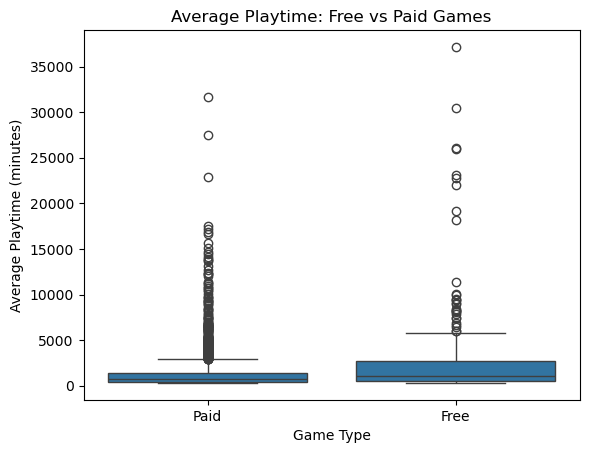

In [144]:
sns.boxplot(data=df_games, x='is_free', y='Average playtime forever')
plt.xticks([0,1], ['Paid', 'Free'])
plt.title('Average Playtime: Free vs Paid Games')
plt.ylabel('Average Playtime (minutes)')
plt.xlabel('Game Type')
plt.show()

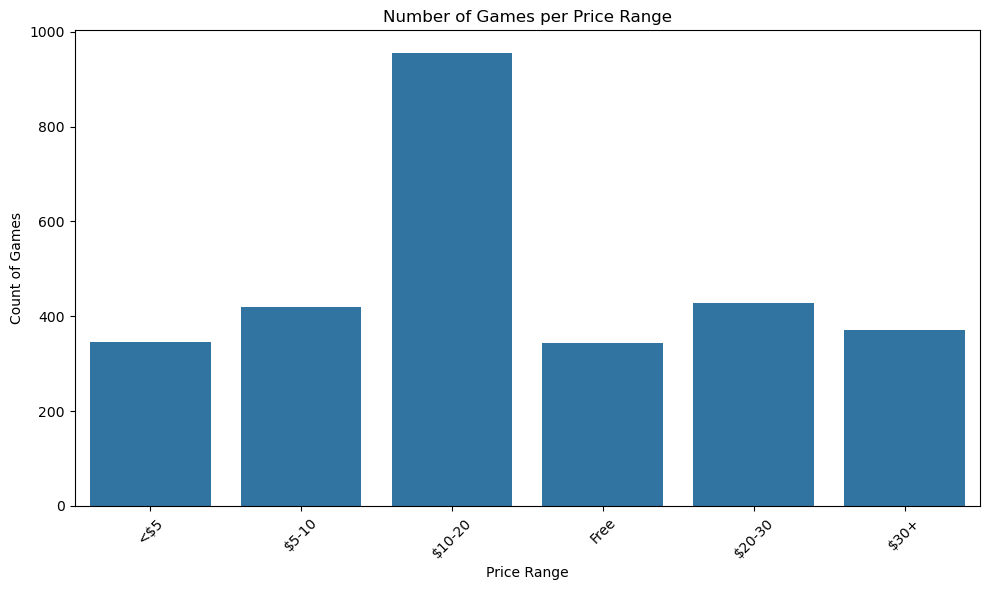

In [145]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_games, x = 'Price Range', order=df['Price Range'].value_counts().index)
plt.title('Number of Games per Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

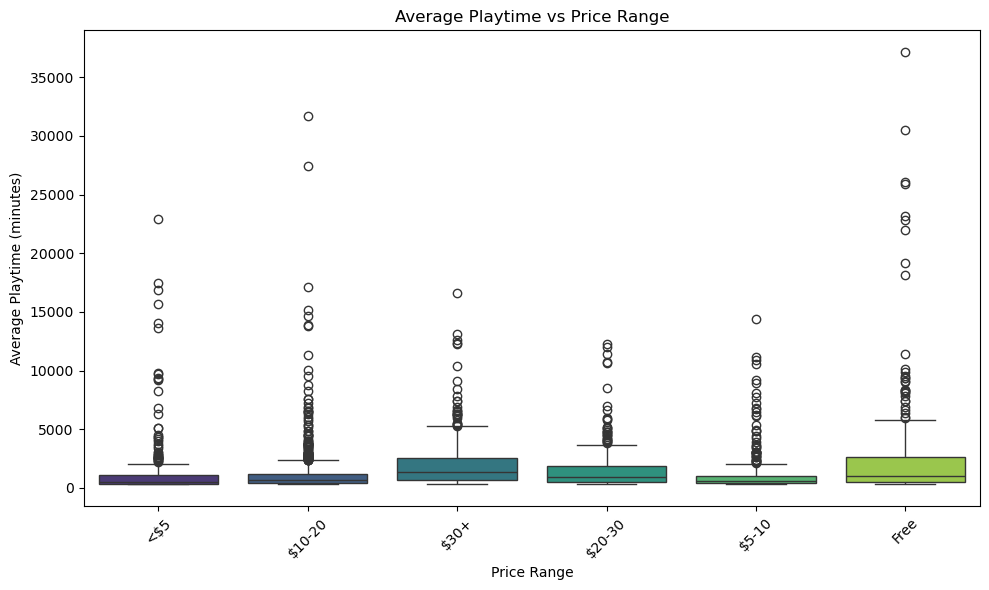

In [148]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.boxplot(data=df_games, x='Price Range', y='Average playtime forever', hue = 'Price Range',  palette='viridis')

# Set plot titles and labels
plt.title('Average Playtime vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Playtime (minutes)')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

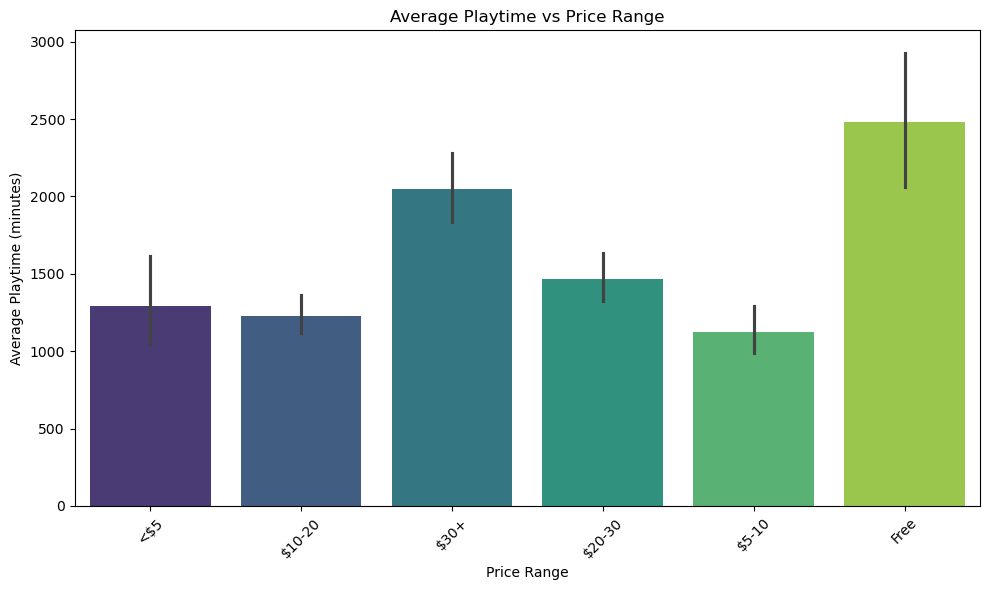

In [149]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.barplot(data=df_games, x='Price Range', y='Average playtime forever', hue = 'Price Range', palette='viridis')

# Set plot titles and labels
plt.title('Average Playtime vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Playtime (minutes)')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

In [151]:
pd.reset_option('display.max_rows', None)

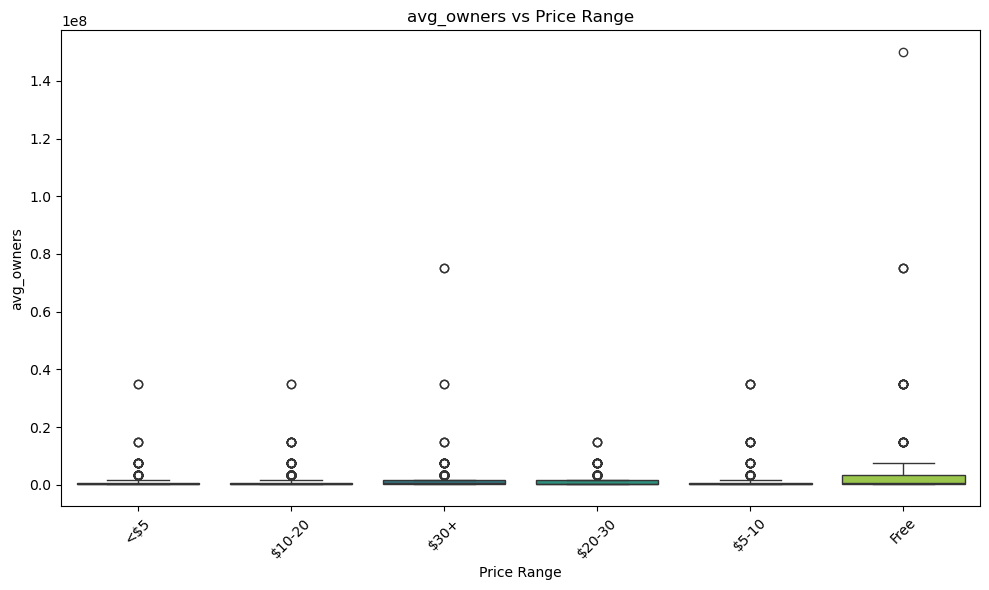

In [153]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.boxplot(data=df_games, x='Price Range', y='avg_owners', hue = 'Price Range', palette='viridis')

# Set plot titles and labels
plt.title('avg_owners vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('avg_owners')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

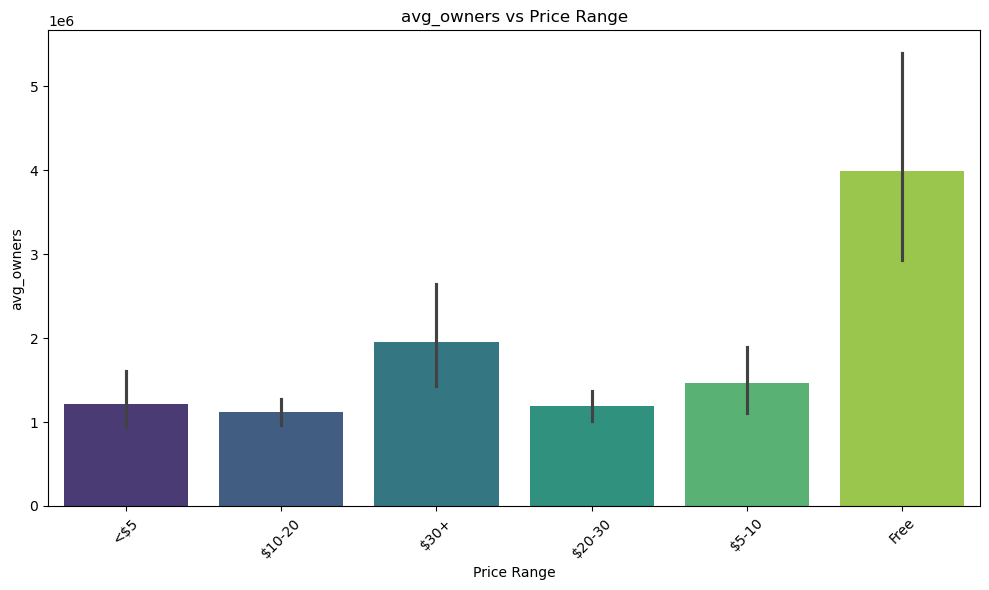

In [155]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.barplot(data=df_games, x='Price Range', y='avg_owners', hue = 'Price Range', palette='viridis')

# Set plot titles and labels
plt.title('avg_owners vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('avg_owners')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

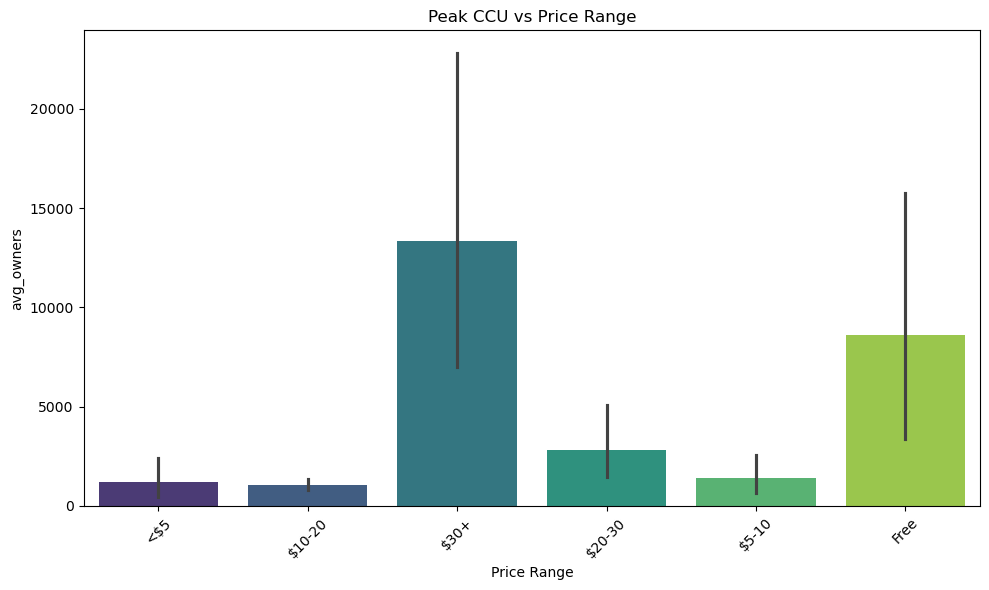

In [208]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.barplot(data=df_games, x='Price Range', y='Peak CCU', hue = 'Price Range', palette='viridis')

# Set plot titles and labels
plt.title('Peak CCU vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('avg_owners')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

In [222]:
df_games[df_games['Price Range'] == '$30+'].sort_values('avg_owners', ascending = False).head(20) 

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range,is_multiplayer
96948,2358720,Black Myth: Wukong,2024-08-19,50000000 - 100000000,1214621,59.99,0,1,Black Myth: Wukong is an action RPG rooted in ...,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'Simplified Chinese', 'Italian']",NaN,True,False,False,0,0,663109,28700,81,519578,1855,1855,1507,1507,Game Science,Game Science,"single-player,steam achievements,full controll...","Action,Adventure,RPG","Mythology,Action RPG,Action,RPG,Souls-like,Com...",2024.0,50000000,100000000,75000000,False,$30+,False
7030,1063730,New World,2021-09-28,50000000 - 100000000,16688,39.99,0,0,"Explore a thrilling, open-world MMO filled wit...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,70,0,154914,73900,133,196597,7432,607,3093,259,Amazon Games,Amazon Games,"multi-player,mmo,pvp,online pvp,co-op,online c...","Action,Adventure,Massively Multiplayer,RPG","Massively Multiplayer,Open World,MMORPG,RPG,Ad...",2021.0,50000000,100000000,75000000,False,$30+,True
32756,1245620,ELDEN RING,2022-02-24,20000000 - 50000000,46431,59.99,0,0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Traditional Chinese']",“Put a ring on it.” 10/10 – IGN “An unmissable...,True,False,False,94,0,460812,51238,42,391693,5293,403,4467,131,FromSoftware Inc.,"FromSoftware Inc.,Bandai Namco Entertainment","single-player,multi-player,pvp,online pvp,co-o...","Action,RPG","Souls-like,Relaxing,Dark Fantasy,RPG,Difficult...",2022.0,20000000,50000000,35000000,False,$30+,True
35001,252490,Rust,2018-02-08,20000000 - 50000000,96112,39.99,0,4,The only aim in Rust is to survive. Everything...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...","“Rust is one of the cruelest games on Steam, a...",True,True,False,69,0,703687,108223,90,655687,16623,1437,3035,710,Facepunch Studios,Facepunch Studios,"multi-player,mmo,pvp,online pvp,co-op,online c...","Action,Adventure,Indie,Massively Multiplayer,RPG","Survival,Crafting,Multiplayer,Open World,Open ...",2018.0,20000000,50000000,35000000,False,$30+,True
53715,292030,The Witcher® 3: Wild Hunt,2015-05-18,10000000 - 20000000,16482,39.99,0,22,The Witcher: Wild Hunt is a story-driven open ...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Japanese', 'P...",“ONE OF THE BEST GAMES EVER MADE” 10/10 – Game...,True,False,False,93,0,617738,25020,78,591701,3696,638,929,112,CD PROJEKT RED,CD PROJEKT RED,"single-player,steam achievements,full controll...",RPG,"Open World,RPG,Story Rich,Atmospheric,Mature,F...",2015.0,10000000,20000000,15000000,False,$30+,False
18378,261550,Mount & Blade II: Bannerlord,2020-03-30,10000000 - 20000000,17196,49.99,0,0,"The horns sound, the ravens gather. An empire ...","['English', 'Simplified Chinese', 'Turkish', '...","['English', 'Spanish - Latin America']",NaN,True,False,False,0,0,167602,23552,0,150622,5482,654,3047,538,TaleWorlds Entertainment,TaleWorlds Entertainment,"single-player,multi-player,pvp,online pvp,part...","Action,RPG,Simulation,Strategy,Early Access","Medieval,Strategy,Open World,RPG,War,Sandbox,M...",2020.0,10000000,20000000,15000000,False,$30+,True
8009,1091500,Cyberpunk 2077,2020-12-09,10000000 - 20000000,13739,59.99,0,1,"Cyberpunk 2077 is an open-world, action-advent...","['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,86,0,391643,129925,44,458744,3851,265,2420,

In [218]:
df_games[df_games['Price Range'] == 'Free'].sort_values('avg_owners', ascending = False).head(20)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range,is_multiplayer
17585,570,Dota 2,2013-07-09,100000000 - 200000000,558759,0.0,0,2,"The most-played game on Steam. Every day, mill...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...",“A modern multiplayer masterpiece.” 9.5/10 – D...,True,True,True,90,0,1477153,300437,0,14300,37162,1647,880,749,Valve,Valve,"multi-player,co-op,steam trading cards,steam w...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",2013.0,100000000,200000000,150000000,True,Free,True
8885,578080,PUBG: BATTLEGROUNDS,2017-12-21,50000000 - 100000000,275374,0.0,0,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","['English', 'Korean', 'Simplified Chinese', 'F...",[],NaN,True,False,False,0,0,1154655,895978,37,1616422,21963,790,7134,152,"KRAFTON, Inc.","KRAFTON, Inc.","multi-player,pvp,online pvp,stats,remote play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",2017.0,50000000,100000000,75000000,True,Free,True
30583,440,Team Fortress 2,2007-10-10,50000000 - 100000000,107702,0.0,0,1,The most fun you can have online - PC Gamer Is...,"['English', 'Danish', 'Dutch', 'Finnish', 'Fre...","['English', 'Ukrainian']",NaN,True,True,True,92,0,823693,56683,520,14410,9916,2299,370,694,Valve,Valve,"multi-player,cross-platform multiplayer,steam ...","Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",2007.0,50000000,100000000,75000000,True,Free,True
46158,730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0.0,0,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",NaN,True,True,True,83,0,5764420,766677,167,3441592,30484,777,6357,253,"Valve,Hidden Path Entertainment",Valve,"multi-player,steam achievements,full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",2012.0,50000000,100000000,75000000,True,Free,True
47533,291550,Brawlhalla,2017-10-17,20000000 - 50000000,16482,0.0,0,6,Brawlhalla : History's greatest warriors brawl...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Traditional Chinese']",“Brawlhalla is a wickedly fun platform brawler...,True,True,False,0,0,246362,46611,49,2831,2495,176,206,53,Blue Mammoth Games,Ubisoft,"single-player,multi-player,pvp,online pvp,shar...","Action,Free to Play,Indie","Free to Play,Multiplayer,Fighting,Casual,2D Fi...",2017.0,20000000,50000000,35000000,True,Free,True
52803,1240440,Halo Infinite,2021-11-15,20000000 - 50000000,5934,0.0,0,1,Lone Wolves: Season 2 Available Now! Lone Wolv...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,0,0,106133,38163,119,22588,1075,779,163,110,343 Industries,Xbox Game Studios,"multi-player,pvp,online pvp,lan pvp,cross-plat...","Action,Free to Play","Free to Play,FPS,Multiplayer,Action,Shooter,Fi...",2021.0,20000000,50000000,35000000,True,Free,True
7015,1085660,Destiny 2,2019-10-01,20000000 - 50000000,72573,0.0,0,10,Dive into the world of Destiny 2 to explore th...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,83,0,403109,77006,23,113688,9390,1205,431,462,Bungie,Bungie,"single-player,multi-player,pvp,online pvp,co-o...","Action,Adventure,Free to Play","Free to Play,Open World,Looter Shooter,FPS,PvP...",2019.0,20000000,50000000,35000000,True,Free,True
47658,1599340,Lost Ark,2022-02-11,20000000 - 5000

# Creating multiplier column

In [161]:
df_games['Categories'] = df_games['Categories'].fillna('').str.lower()

# Create multiplayer flag
df_games['is_multiplayer'] = (
    df_games['Categories'].str.contains('multiplayer', case=False, na=False) |
    df_games['Genres'].str.contains('multiplayer', case=False, na=False) |
    df_games['Tags'].str.contains('multiplayer', case=False, na=False)
)

     


In [165]:
df_games['is_multiplayer'].value_counts()


is_multiplayer
True     1557
False    1304
Name: count, dtype: int64

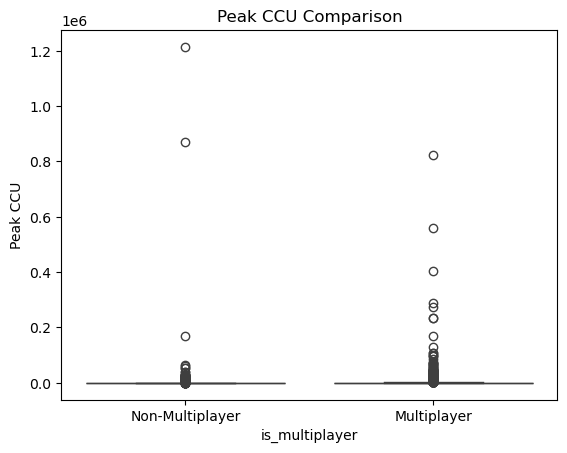

In [167]:
sns.boxplot(x='is_multiplayer', y='Peak CCU', data=df_games)
plt.xticks([0, 1], ['Non-Multiplayer', 'Multiplayer'])
plt.title('Peak CCU Comparison')
plt.show()


In [169]:
df_games.groupby('is_multiplayer')['Average playtime forever'].mean()

is_multiplayer
False    1155.988497
True     1814.521516
Name: Average playtime forever, dtype: float64

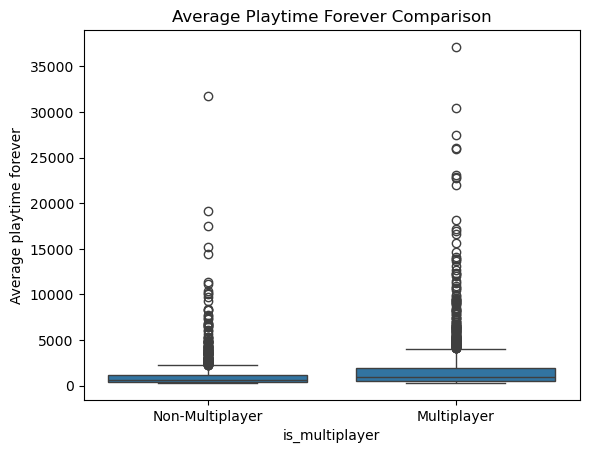

In [171]:
sns.boxplot(x='is_multiplayer', y='Average playtime forever', data=df_games)
plt.xticks([0, 1], ['Non-Multiplayer', 'Multiplayer'])
plt.title('Average Playtime Forever Comparison')
plt.show()


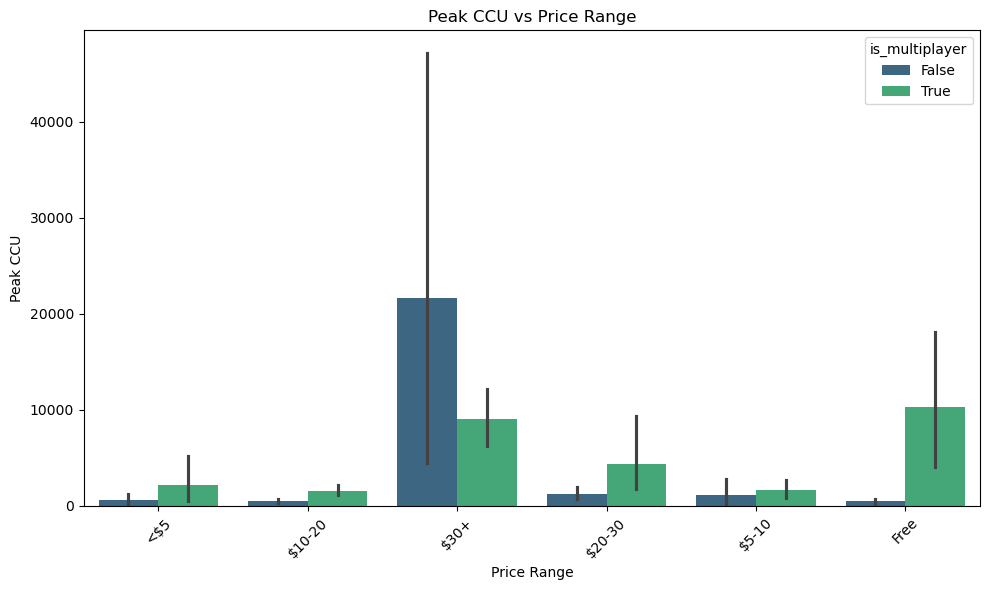

In [173]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.barplot(data=df_games, x='Price Range', y='Peak CCU', hue = 'is_multiplayer', palette='viridis')

# Set plot titles and labels
plt.title('Peak CCU vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Peak CCU')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

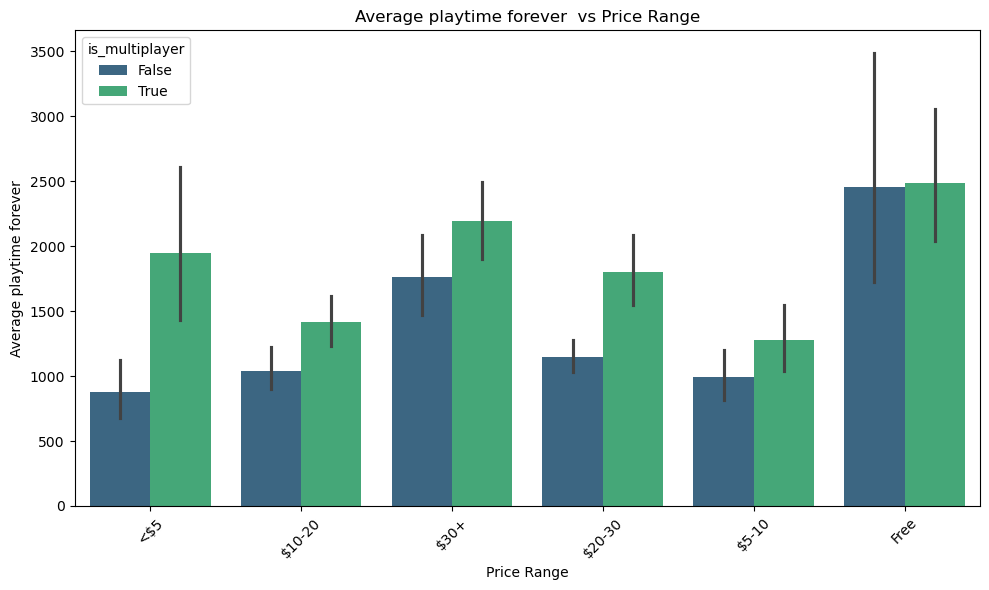

In [224]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.barplot(data=df_games, x='Price Range', y='Average playtime forever', hue = 'is_multiplayer', palette='viridis')

# Set plot titles and labels
plt.title('Average playtime forever  vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average playtime forever')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

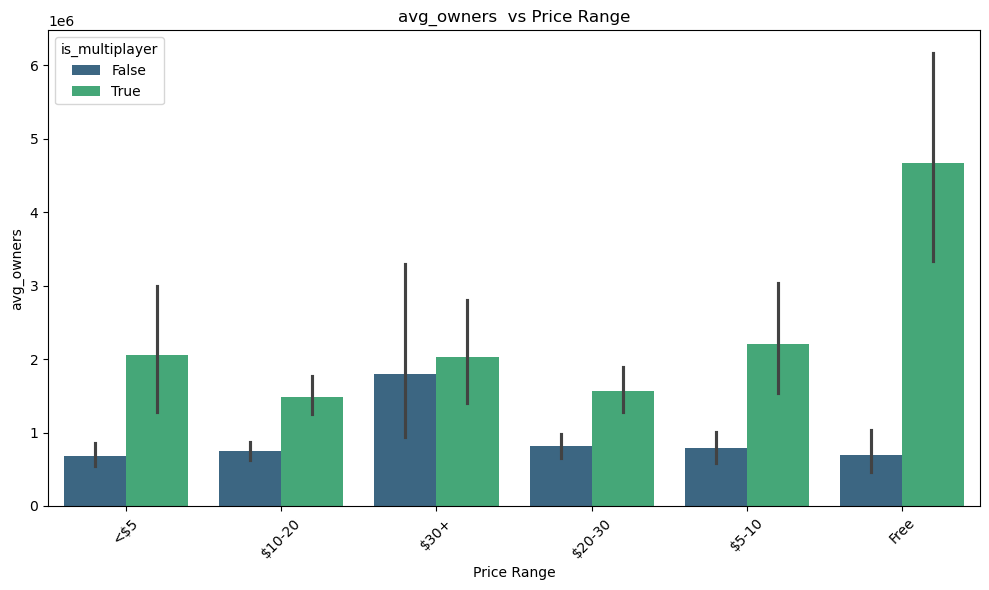

In [175]:
plt.figure(figsize=(10, 6))

# Create boxplot for playtime by price range
sns.barplot(data=df_games, x='Price Range', y='avg_owners', hue = 'is_multiplayer', palette='viridis')

# Set plot titles and labels
plt.title('avg_owners  vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('avg_owners')
plt.xticks(rotation=45)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

In [177]:
df_games[(df_games['Price Range'] == '$30+')].sort_values('Peak CCU', ascending =False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Year,min_owners,max_owners,avg_owners,is_free,Price Range,is_multiplayer
96948,2358720,Black Myth: Wukong,2024-08-19,50000000 - 100000000,1214621,59.99,0,1,Black Myth: Wukong is an action RPG rooted in ...,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'Simplified Chinese', 'Italian']",NaN,True,False,False,0,0,663109,28700,81,519578,1855,1855,1507,1507,Game Science,Game Science,"single-player,steam achievements,full controll...","Action,Adventure,RPG","Mythology,Action RPG,Action,RPG,Souls-like,Com...",2024.0,50000000,100000000,75000000,False,$30+,False
69429,990080,Hogwarts Legacy,2023-02-10,5000000 - 10000000,872138,59.99,0,1,Hogwarts Legacy is an open-world action RPG se...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,84,0,33521,2000,45,55658,661,661,501,501,Avalanche Software,Warner Bros. Games,"single-player,steam achievements,full controll...","Action,Adventure,RPG","Magic,Fantasy,Open World,Adventure,Singleplaye...",2023.0,5000000,10000000,7500000,False,$30+,False
65186,1938090,Call of Duty®: Modern Warfare® II,2022-10-27,2000000 - 5000000,233454,69.99,0,1,Existing Modern Warfare® II Digital Standard E...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,0,0,16018,12744,24,28253,787,787,727,727,"Infinity Ward,Raven Software,Beenox,Treyarch,H...",Activision,"single-player,multi-player,pvp,online pvp,co-o...",Action,"FPS,Action,Multiplayer,Shooter,Military,First-...",2022.0,2000000,5000000,3500000,False,$30+,True
101395,2300320,Farming Simulator 25,2024-11-12,200000 - 500000,128593,49.99,0,3,Farming Simulator 25 invites you to join the r...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Indonesian']",NaN,True,True,False,0,0,5772,2148,45,6032,483,483,421,421,Giants Software,Giants Software,"single-player,multi-player,co-op,online co-op,...",Simulation,"Simulation,Farming Sim,Realistic,Immersive Sim...",2024.0,200000,500000,350000,False,$30+,True
76336,1282100,Remnant II,2023-07-25,500000 - 1000000,108679,49.99,0,0,Unimaginable Worlds. Unrelenting Odds Remnant ...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",“Remnant 2 is a revolutionary sequel and a ste...,True,False,False,0,0,9295,2372,50,9091,680,680,565,565,Gunfire Games,Gearbox Publishing,"single-player,multi-player,co-op,online co-op,...","Action,Adventure,RPG","Souls-like,Action,Adventure,RPG,Dark,Shooter,T...",2023.0,500000,1000000,750000,False,$30+,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56840,375900,Trackmania® Turbo,2016-03-24,100000 - 200000,13,39.99,0,0,Test your skills in outlandish tracks and chal...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Simplified Chinese']",NaN,True,False,False,0,0,918,479,0,1321,363,0,306,0,Nadeo,Ubisoft,"single-player,multi-player,shared/split screen...","Massively Multiplayer,Racing","Racing,Massively Multiplayer,Arcade,Level Edit...",2016.0,100000,200000,150000,False,$30+,True
18741,449800,Attack on Titan / A.O.T. Wings of Freedom,2016-08-26,100000 - 200000,9,59.99,0,11,An international hit anime 'Attack on Titan' h...,"['English', 'French', 'German', 'Traditional C...",[],NaN,True,False,False,0,0,3104,542,43,3226,1306,0,1371,0,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.","single-player,multi-player,co-op,online co-op,...",Action,"Anime,Action,Gore,Multiplayer,Si

In [179]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 34 to 103695
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       2861 non-null   int64         
 1   Name                        2861 non-null   object        
 2   Release date                2846 non-null   datetime64[ns]
 3   Estimated owners            2861 non-null   object        
 4   Peak CCU                    2861 non-null   int64         
 5   Price                       2861 non-null   float64       
 6   Discount                    2861 non-null   int64         
 7   DLC count                   2861 non-null   int64         
 8   About the game              2861 non-null   object        
 9   Supported languages         2861 non-null   object        
 10  Full audio languages        2861 non-null   object        
 11  Reviews                     1030 non-null   object        

In [181]:
numerical_columns_df = df_games.select_dtypes(include=['number'])

# Now compute the correlation matrix
corr_matrix_df = numerical_columns_df.corr()
corr_matrix_df

,AppID,Peak CCU,Price,Discount,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Year,min_owners,max_owners,avg_owners
AppID,1.000000,0.100826,0.285196,0.089165,-0.028298,-0.303725,0.008170,-0.052709,-0.019878,0.000707,-0.037770,0.004091,0.130012,0.117482,0.141705,0.819991,-0.066885,-0.068673,-0.068181
Peak CCU,0.100826,1.000000,0.087979,-0.002802,0.000799,0.015546,-0.001909,0.560770,0.473119,0.019636,0.491692,0.261961,0.079743,0.049349,0.041510,0.071315,0.579434,0.562818,0.568807
Price,0.285196,0.087979,1.000000,0.001917,0.073331,0.122678,-0.022195,0.001724,-0.002993,-0.007203,0.044891,0.030347,0.066190,0.081233,0.064617,0.328440,-0.033936,-0.034903,-0.034634
Discount,0.089165,-0.002802,0.001917,1.000000,-0.001991,-0.004051,-0.000583,-0.005374,-0.004471,-0.001638,-0.005890,-0.012852,0.002229,-0.006357,0.001453,0.058727,-0.007847,-0.007970,-0.007940
DLC count,-0.028298,0.000799,0.073331,-0.001991,1.000000,-0.014684,-0.000453,0.009651,0.006408,0.067178,0.009452,0.042592,0.008487,0.019635,0.007352,0.000492,0.009060,0.009547,0.009402
Metacritic score,-0.303725,0.015546,0.122678,-0.004051,-0.014684,1.000000,-0.016853,0.096007,0.037620,-0.013701,0.095187,0.022118,0.032629,-0.067379,0.030144,-0.330440,0.111786,0.114955,0.114074
User score,0.008170,-0.001909,-0.022195,-0.000583,-0.000453,-0.016853,1.000000,-0.003344,-0.002595,-0.002492,-0.003777,-0.008349,-0.005139,-0.007026,-0.005016,0.006413,-0.005031,-0.005239,-0.005178
Positive,-0.052709,0.560770,0.001724,-0.005374,0.009651,0.096007,-0.003344,1.000000,0.777664,0.047253,0.926117,0.419755,0.071736,0.073346,0.024950,-0.044503,0.666959,0.664366,0.665978
Negative,-0.019878,0.473119,-0.002993,-0.004471,0.006408,0.037620,-0.002595,0.777664,1.000000,0.025793,0.811615,0.413200,0.071420,0.091290,0.028993,-0.002465,0.644839,0.629690,0.635288
Achievements,0.000707,0.019636,-0.007203,-0.001638,0.067178,-0.013701,-0.002492,0.047253,0.025793,1.000000,0.042008,0.049861,0.013693,0.011247,0.003141,0.028214,0.056118,0.059208,0.058287


                          Average playtime forever     Price  Positive  \
Average playtime forever                  1.000000  0.030347  0.419755   
Price                                     0.030347  1.000000  0.001724   
Positive                                  0.419755  0.001724  1.000000   
Peak CCU                                  0.261961  0.087979  0.560770   
is_free                                   0.145361 -0.415718  0.067255   
avg_owners                                0.436540 -0.034634  0.665978   
Median playtime forever                   0.595436  0.081233  0.073346   
Recommendations                           0.384007  0.044891  0.926117   

                          Peak CCU   is_free  avg_owners  \
Average playtime forever  0.261961  0.145361    0.436540   
Price                     0.087979 -0.415718   -0.034634   
Positive                  0.560770  0.067255    0.665978   
Peak CCU                  1.000000  0.047345    0.568807   
is_free                   0.04734

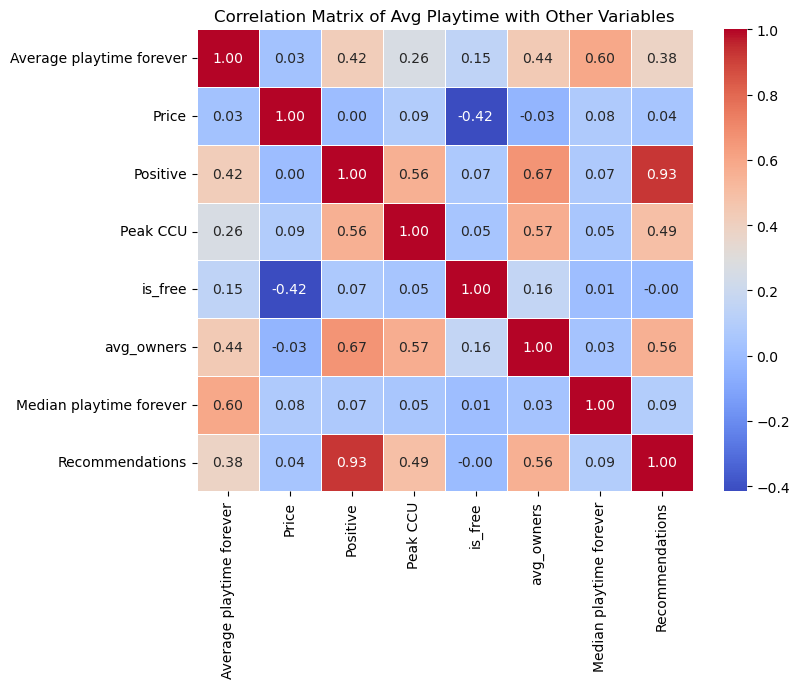

In [184]:
correlation = df_games[['Average playtime forever', 'Price', 'Positive', 'Peak CCU', 'is_free', 'avg_owners', 'Median playtime forever', 'Recommendations']].corr()
print(correlation)

# Visualizing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Avg Playtime with Other Variables')
plt.show()

<Axes: title={'center': 'Number of Games Released per Year'}, xlabel='Year'>

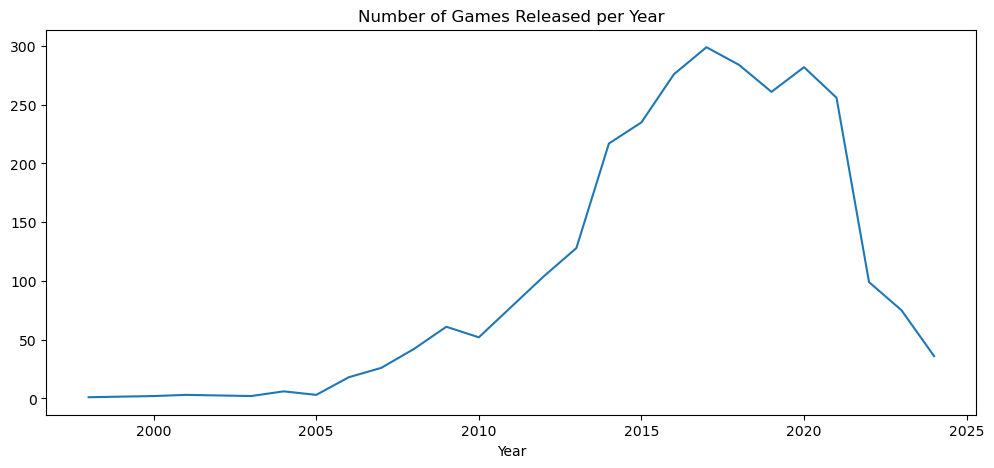

In [226]:
games_per_year = df_games['Year'].value_counts().sort_index()
games_per_year.plot(kind='line', figsize=(12, 5), title='Number of Games Released per Year')

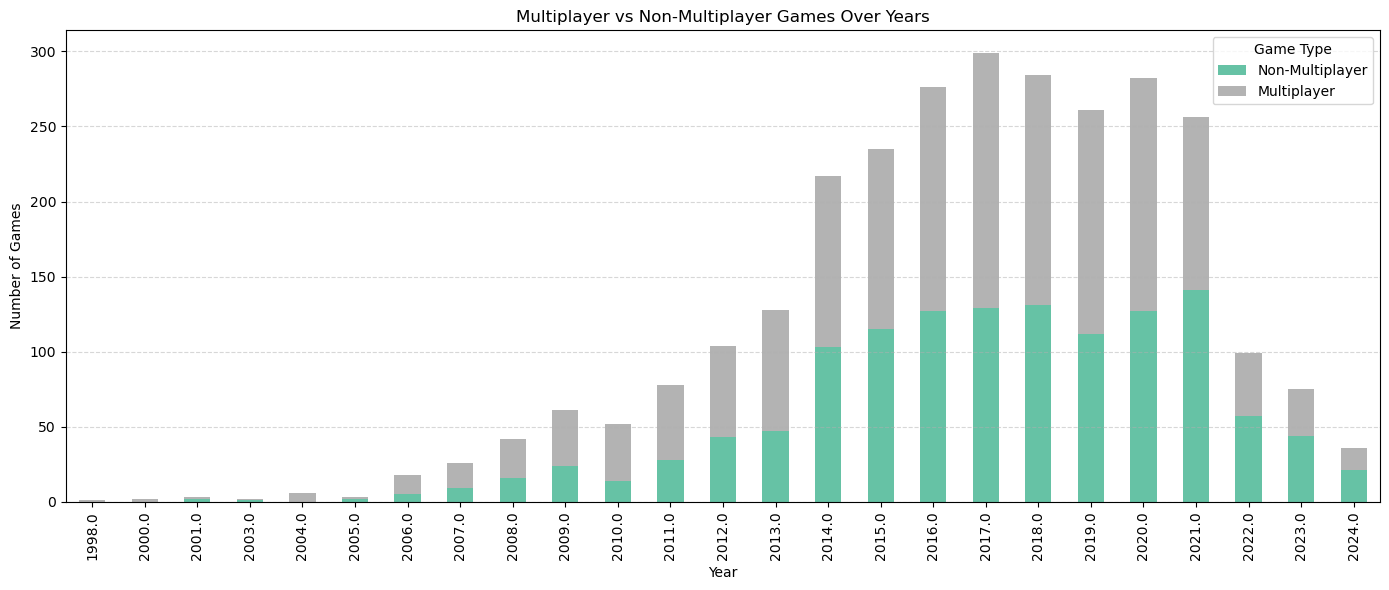

In [187]:


# Count multiplayer vs non-multiplayer games each year
multiplayer_counts = df_games.groupby(['Year', 'is_multiplayer'])['AppID'].count().unstack(fill_value=0)

# Plot
multiplayer_counts.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')
plt.title('Multiplayer vs Non-Multiplayer Games Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend(['Non-Multiplayer', 'Multiplayer'], title='Game Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [193]:
counts = df_games['Year'].value_counts()
valid_years = counts[counts >= 10].index 
valid_years = valid_years[valid_years != 2025]
df_filtered_year = df_games[df_games['Year'].isin(valid_years)]


In [197]:
counts

Year
2017.0    299
2018.0    284
2020.0    282
2016.0    276
2019.0    261
2021.0    256
2015.0    235
2014.0    217
2013.0    128
2012.0    104
2022.0     99
2011.0     78
2023.0     75
2009.0     61
2010.0     52
2008.0     42
2024.0     36
2007.0     26
2006.0     18
2004.0      6
2005.0      3
2001.0      3
2003.0      2
2000.0      2
1998.0      1
Name: count, dtype: int64

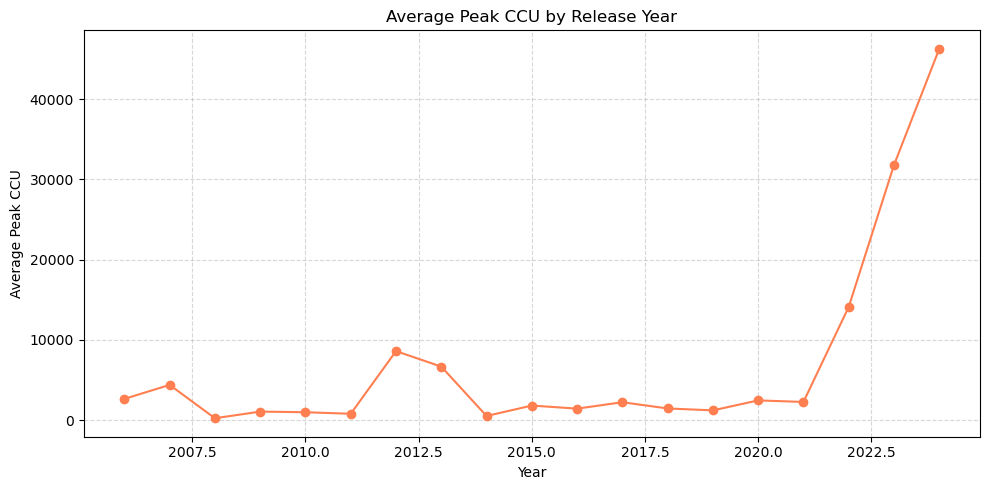

In [199]:
ccu_trend = df_filtered_year.groupby('Year')['Peak CCU'].mean()
plt.figure(figsize=(10, 5))
ccu_trend.plot(marker='o', color='coral')
plt.title('Average Peak CCU by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Peak CCU')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


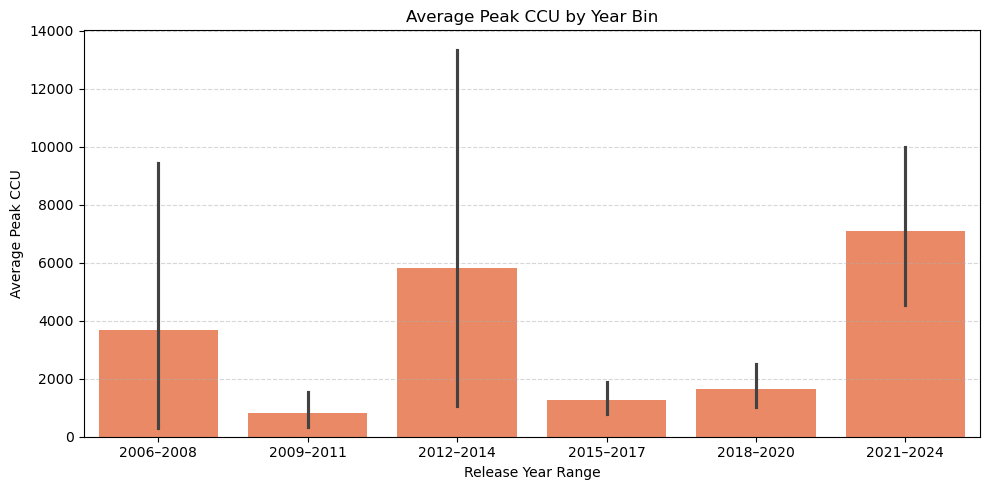

In [201]:
bins = [2005, 2008, 2011, 2014, 2017, 2020, 2024]
labels = ['2006–2008', '2009–2011', '2012–2014', '2015–2017', '2018–2020', '2021–2024']


# Group and plot
df_binned = df_filtered_year.copy()
df_binned['Year_Bin'] = pd.cut(df_binned['Year'], bins=bins, labels=labels, right = False)

# Step 3: Use seaborn barplot to plot average Peak CCU
plt.figure(figsize=(10, 5))
sns.barplot(data=df_binned, x='Year_Bin', y='Peak CCU', estimator='mean', color='coral')

plt.title('Average Peak CCU by Year Bin')
plt.xlabel('Release Year Range')
plt.ylabel('Average Peak CCU')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

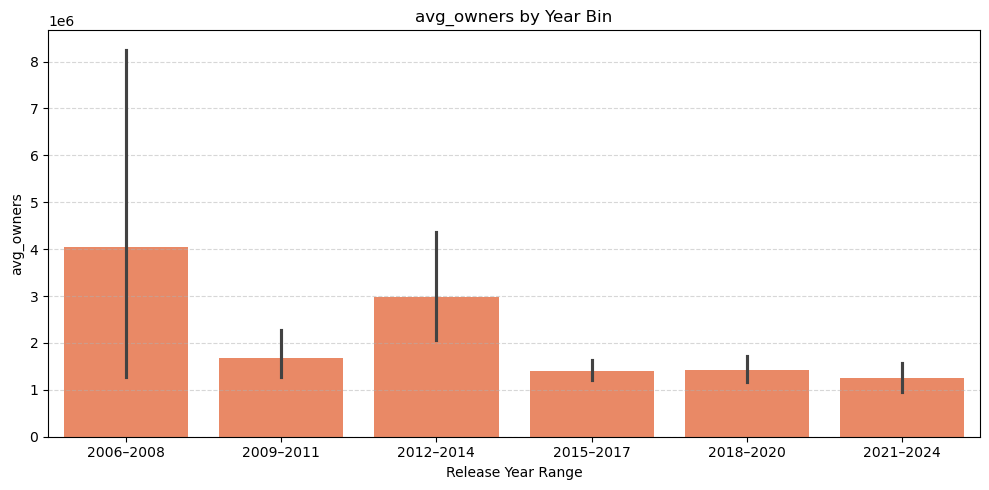

In [202]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_binned, x='Year_Bin', y='avg_owners', estimator='mean', color='coral')

plt.title('avg_owners by Year Bin')
plt.xlabel('Release Year Range')
plt.ylabel('avg_owners')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

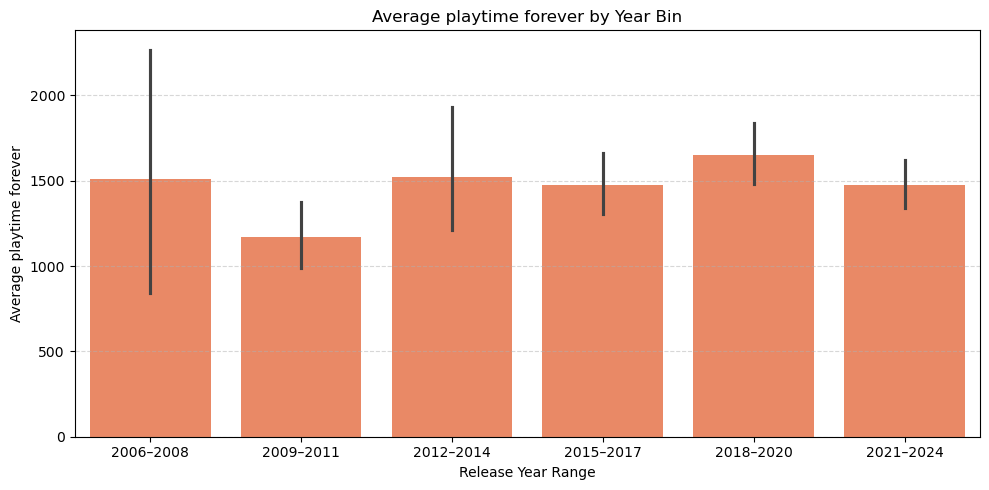

In [204]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_binned, x='Year_Bin', y='Average playtime forever', estimator='mean', color='coral')

plt.title('Average playtime forever by Year Bin')
plt.xlabel('Release Year Range')
plt.ylabel('Average playtime forever')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

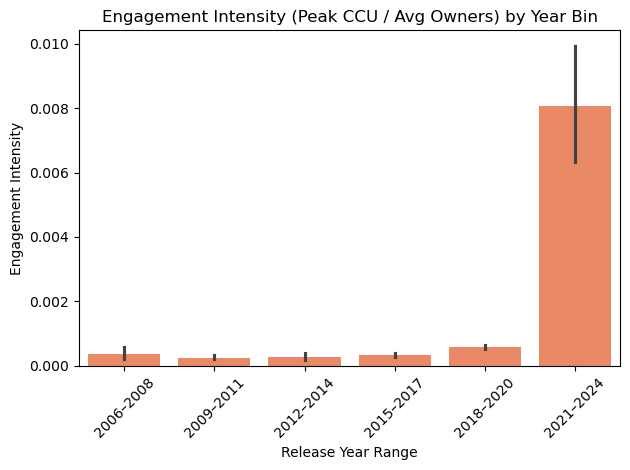

In [236]:

# Calculate engagement intensity
df_binned['engagement_intensity'] = df_binned['Peak CCU'] / df_binned['avg_owners']

# Drop inf/nan values caused by division
df_binned = df_binned.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['engagement_intensity'])

# Group by year bin and plot
sns.barplot(data=df_binned, x='Year_Bin', y='engagement_intensity', color='coral')
plt.title('Engagement Intensity (Peak CCU / Avg Owners) by Year Bin')
plt.ylabel('Engagement Intensity')
plt.xlabel('Release Year Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
